# Creating and Operating on pandas Dataframes

Suppose we need to create a DataFrame for a retail chain to record the following information:

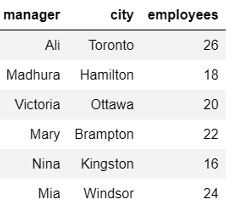

We may construct the DataFrame from a dictionary

In [1]:
# First construct the dictionary


In [2]:
# Then, construct the DataFrame


Notice how we first created a dictionary by the name stores_dict, which was used in the `DataFrame()` function to create a pandas Dataframe stores. (**Note**: pay attention to the  the upper and lower case letters in the  `DataFrame()` function)

# Indexing, Slicing, and Filtering

## Column Names and Row Indexes

We can extract the column (variable) names

In [1]:
# Get the column names

In [3]:
# Accessing a column name

We can also get the indexex of the rows

In [5]:
# Get the indexes of all rows

In [4]:
# Show it as a list

## Selecting elements of Dataframes

### Selecting rows

Rows (observations) of a Dataframe can be selected using the `iloc` property (short for **integer location**).

For example, suppose we want to extract the fourth row.


Extracting **multiple** rows:

* First, let's extract a range of rows; e.g., the second to the fourth row (rows with indexes 1 to 3). 

* Second, let's extract the first, third, and fifth row (indexes 0, 2, 4), which is not a continuous range of rows

In [6]:
# First task


In [7]:
# Second task


If we want to index certain rows and particular columns, we need to include both row indexes and column indexes in `iloc[]`.

For example, to get 'manager' (column 0) and 'employees' (column 2) from rows 0,2,4:

Another attribute `loc` of a DataFrame can be used for indexing.

* Unlike `iloc`, the attribute `loc` can use labels (column names) instead of indexes

In [8]:
# Get the 'manager' and 'employees' column from rows 0, 2, and 4


### Selecting columns

We can select column using `name_of_df[column_label]`, for exampe:

In [9]:
# Selecting the 'city' column

In [10]:
# Selecting 'manager' and 'city'

Equivalently we can use `iloc` or `loc` with all the rows selected

We can even use `name_of_df.name_of_column`!

Selecting more than 1 column using `df[list_of_column_names]`

## Adding or deleting columns and rows

Let's add a column of the stores' revenue in a month, say, 341, 280, 300, 260, 213, 182 (in thousand $).

* By default, the column will be added as the last column

In [11]:
# Adding a column of the store revues: 341, 280, 300, 260, 213, 182


We can also create a new column based on existing ones.

For example, we can define a column of **revenue_per_employee** $=\frac{\rm revenue}{\rm employees}$.

In the above DataFrame, each value of the variable 'rev_emp' is equal the value of 'revenue' divided by 'employees' in the same column.

To drop a row, say row 4, we can use the `drop()` function and specify the index of the row to drop

**Note**: Observe that we have used the argument `inplace = True`. If this argument is not added, the DataFrame itself will not be modified but returns a copy of the DataFrame without the deleted row.

By adding `inplace = True`, we indicate we want to modify the DataFrame in place.

`drop()` delete rows by default. 

To delete a column, we can specify an argument `axis=1`

**Note**: Again notice that we have again included the argument `inplace = True` indicating that we want the Dataframe to actually be modified.

## Resetting the indexes after deletion

The row indexes become discontinous after dropping a row.

To fix, we can use `reset_index()` to reset the indexes.

## Filtering a Dataframe

Suppose that we would like to identify the under-staffed stores. 

We can do so by filtering the Dataframe based on a certain condition, by `df[condition]`. 
* The result of the filtering will be all the rows that satisfy the certain condition. 
* For example, let's get the stores that had fewer than 24 employees.

We can also use the symbols `&` (AND) and `|` (OR) in filtering a Dataframe.

For example, we can filter out stores with fewer than 24 employees and a revenue below 270.

A condition using OR (using the symbol "|") can be done similarly.

## Modifying the values of some entries

<img src="./stores_df.png" alt="stores" style="width:300px;"/>

Suppose that a person named Ray is the new manager of the Windsor store, and we need to update the record 


## Converting a Dataframe (or part of it) to an array

Sometimes we need to convert parts of a DataFrame to an array
* May be useful in some machine learning algorithms, because some algorithms work well with NumPy arrays and require us to convert parts of the Dataframe that we are working with to an array before operation.

In such cases, we may use the `values` attribute of a DataFrame.
* Using `values` will return an array without the headers

In [12]:
# Convert the whole DataFrame to an array
 

In [54]:
# Conver part of the DataFrame into an array
type(stores.loc[0:4,'employees'].values)

numpy.ndarray

We can convert an array to a DataFrame by adding headers